In [262]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


data = pd.read_csv("SII_Zadanie_5.csv")

numeric_features = [
    "year",
    "na_sales",
    "eu_sales",
    "other_sales",
]

categorical_features = [
    "platform",
    "genre",
    "publisher",
]

encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(data[categorical_features])

X = pd.concat([data[numeric_features], pd.DataFrame(encoded_features.toarray())], axis=1)

# Добавим константный признак для обучения свободного члена модели
X['const'] = 1

y = data["jp_sales"]

scaler = StandardScaler()

X[numeric_features] = scaler.fit_transform(X[numeric_features])

In [263]:
import time
import numpy as np
from sklearn.metrics import mean_squared_error

class GradientDescent:
    def __init__(self, learning_rate=0.001, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.errors = []

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])

        for _ in range(self.n_iterations):
            y_pred = X.dot(self.weights)
            error = y_pred - y
            gradient = X.T.dot(error) / len(y)
            self.weights -= self.learning_rate * gradient

            mse = mean_squared_error(y, y_pred)
            self.errors.append(mse)

        return self.weights


In [264]:
class Adam:
    def __init__(self, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8, n_iterations=1000):
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.n_iterations = n_iterations
        self.weights = None
        self.errors = []

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        m = np.zeros_like(self.weights)
        v = np.zeros_like(self.weights)
        t = 0

        for _ in range(self.n_iterations):
            t += 1
            y_pred = X.dot(self.weights)
            error = y_pred - y
            gradient = X.T.dot(error) / len(y)

            m = self.beta1 * m + (1 - self.beta1) * gradient
            v = self.beta2 * v + (1 - self.beta2) * gradient**2

            m_hat = m / (1 - self.beta1**t)
            v_hat = v / (1 - self.beta2**t)

            self.weights -= self.learning_rate * m_hat / (np.sqrt(v_hat) + self.epsilon)

            mse = mean_squared_error(y, y_pred)
            self.errors.append(mse)

        return self.weights


In [265]:
class StochasticGradientDescent:
    def __init__(self, learning_rate=0.001, n_iterations=1000, batch_size=8):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.batch_size = batch_size
        self.weights = None
        self.errors = []

    def fit(self, X, y):
        y = y.values.reshape(-1, 1)
        self.weights = np.zeros(X.shape[1])

        for _ in range(self.n_iterations):
            indices = np.random.choice(len(y), self.batch_size, replace=False)
            X_batch = X[indices]
            y_batch = y[indices]

            y_pred = X_batch.dot(self.weights)
            error = y_pred - y_batch
            gradient = X_batch.T.dot(error) / self.batch_size
            self.weights -= self.learning_rate * gradient.mean(axis=1)

            mse = mean_squared_error(y_batch, y_pred)  
            self.errors.append(mse)

        return self.weights

In [266]:
class AdamStochastic:
    def __init__(self, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8, n_iterations=1000, batch_size=8):
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.n_iterations = n_iterations
        self.batch_size = batch_size
        self.weights = None
        self.errors = []

    def fit(self, X, y):
        y = y.values.reshape(-1, 1) 
        self.weights = np.zeros(X.shape[1])
        m = np.zeros_like(self.weights)
        v = np.zeros_like(self.weights)
        t = 0

        for _ in range(self.n_iterations):
            t += 1
            indices = np.random.choice(len(y), self.batch_size, replace=False)
            X_batch = X[indices]
            y_batch = y[indices]

            y_pred = X_batch.dot(self.weights)
            error = y_pred - y_batch
            gradient = X_batch.T.dot(error) / self.batch_size

            m = self.beta1 * m + (1 - self.beta1) * gradient.mean(axis=1)
            v = self.beta2 * v + (1 - self.beta2) * np.mean(np.square(gradient), axis=1)


            m_hat = m / (1 - self.beta1**t)
            v_hat = v / (1 - self.beta2**t)

            self.weights -= self.learning_rate * m_hat / (np.sqrt(v_hat) + self.epsilon)

            mse = mean_squared_error(y_batch, y_pred)
            self.errors.append(mse)

        return self.weights

In [267]:
def timeit(method):
    def timed(*args, **kw):
        ts = time.time()
        result = method(*args, **kw)
        te = time.time()
        print(f"{method.__name__} выполнено за {te - ts} секунд")
        return result
    return timed

In [268]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Batch Size: 1, Time: 0.2570 seconds, Test MSE: 0.2885790990371629
Batch Size: 2, Time: 0.2680 seconds, Test MSE: 0.33194238999705533
Batch Size: 4, Time: 0.2640 seconds, Test MSE: 0.30012690004267933
Batch Size: 8, Time: 0.2690 seconds, Test MSE: 0.29769315219218684
Batch Size: 16, Time: 0.2820 seconds, Test MSE: 0.29911949001545773
Batch Size: 32, Time: 0.4560 seconds, Test MSE: 0.32472937811793096
Batch Size: 64, Time: 0.5520 seconds, Test MSE: 0.33276591782159026


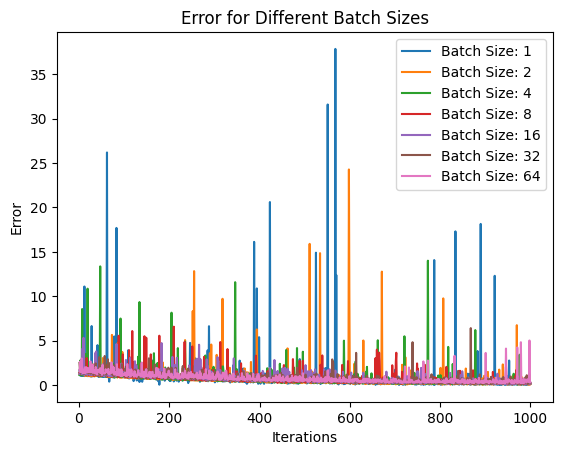

In [275]:
import matplotlib.pyplot as plt
import time

batch_sizes = [1, 2, 4, 8, 16, 32, 64]
results = []

for batch_size in batch_sizes:
    sgd_model = StochasticGradientDescent(learning_rate=0.001, n_iterations=1000, batch_size=batch_size)  # Создаем новый объект для каждого размера батча

    start_time = time.time()
    weights = sgd_model.fit(X_train.values, y_train)
    end_time = time.time()
    elapsed_time = end_time - start_time

    y_pred_test = X_test.dot(weights)
    mse_test = mean_squared_error(y_test, y_pred_test)
    results.append((batch_size, elapsed_time, mse_test))

    plt.plot(range(1, len(sgd_model.errors) + 1), sgd_model.errors, label=f'Batch Size: {batch_size}')

for batch_size, elapsed_time, mse_test in results:
    print(f"Batch Size: {batch_size}, Time: {elapsed_time:.4f} seconds, Test MSE: {mse_test}")

plt.xlabel('Iterations')
plt.ylabel('Error')
plt.legend()
plt.title('Error for Different Batch Sizes')
plt.show()


In [270]:
def plot_error_vs_iteration(model_name, errors_train, errors_test, title="Error vs Iteration"):
    plt.plot(range(1, len(errors_train) + 1), errors_train, label=f"{model_name} Train MSE")
    if errors_test:
        plt.plot(range(1, len(errors_test) + 1), errors_test, label=f"{model_name} Test MSE")
    plt.title(title)
    plt.xlabel("Iteration")
    plt.ylabel("Mean Squared Error")
    plt.legend()
    plt.show()


Gradient Descent Train MSE: 0.28302669766613103
Gradient Descent Test MSE: 0.32000069159383654


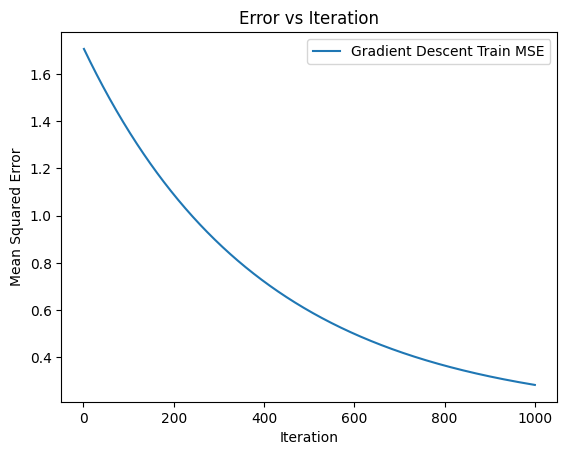

run_gradient_descent выполнено за 7.42799973487854 секунд
-------------------------
Adam Regression Train MSE: 0.12973523474735538
Adam Regression Test MSE: 0.14999101924700434


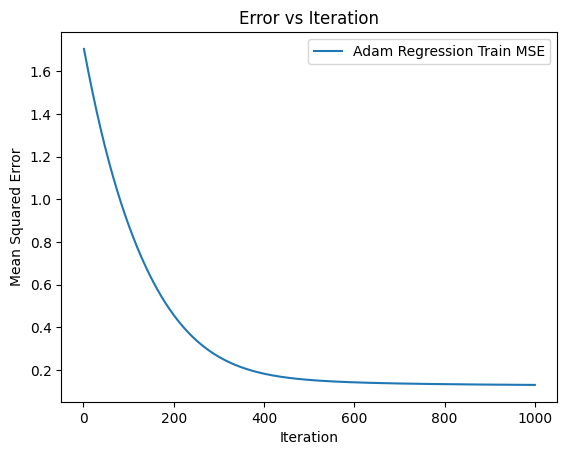

run_adam выполнено за 7.79900050163269 секунд
-------------------------
Stochastic Regression Train MSE: 0.3629283252702023
Stochastic Regression Test MSE: 0.3013266489969885


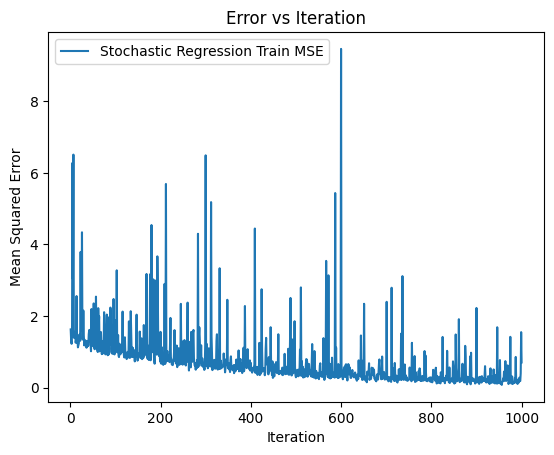

run_stochastic_gradient_descent выполнено за 0.37599873542785645 секунд
-------------------------
Adam Stochastic Regression Train MSE: 0.2048836845920589
Adam Stochastic Regression Test MSE: 0.1907671881034698


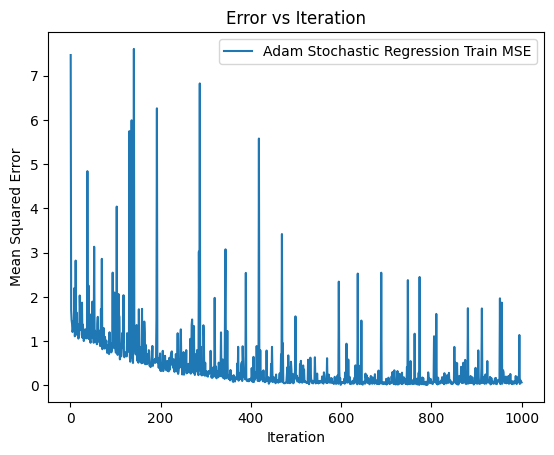

run_adam_stochastic выполнено за 0.40000104904174805 секунд


In [276]:
gd_model = GradientDescent()
adam_model = Adam()
sgd_model = StochasticGradientDescent()
adam_sgd_model = AdamStochastic()


@timeit
def run_gradient_descent():
    weights = gd_model.fit(X_train, y_train)
    y_pred_train = X_train.dot(weights)
    mse_train = mean_squared_error(y_train, y_pred_train)
    print("Gradient Descent Train MSE:", mse_train)

    y_pred_test = X_test.dot(weights)
    mse_test = mean_squared_error(y_test, y_pred_test)
    print("Gradient Descent Test MSE:", mse_test)

    plot_error_vs_iteration("Gradient Descent", gd_model.errors, [])  
    

@timeit
def run_adam():
    weights = adam_model.fit(X_train, y_train)
    y_pred_train = X_train.dot(weights)
    mse_train = mean_squared_error(y_train, y_pred_train)
    print("Adam Regression Train MSE:", mse_train)

    y_pred_test = X_test.dot(weights)
    mse_test = mean_squared_error(y_test, y_pred_test)
    print("Adam Regression Test MSE:", mse_test)

    plot_error_vs_iteration("Adam Regression", adam_model.errors, [])  

@timeit
def run_stochastic_gradient_descent():
    weights = sgd_model.fit(X_train.values, y_train)  
    y_pred_train = X_train.dot(weights)
    mse_train = mean_squared_error(y_train, y_pred_train)
    print(f"Stochastic Regression Train MSE: {mse_train}")

    y_pred_test = X_test.dot(weights)
    mse_test = mean_squared_error(y_test, y_pred_test)
    print(f"Stochastic Regression Test MSE: {mse_test}")

    plot_error_vs_iteration("Stochastic Regression", sgd_model.errors, [])


@timeit
def run_adam_stochastic():
    weights = adam_sgd_model.fit(X_train.values, y_train)
    y_pred_train = X_train.dot(weights)
    mse_train = mean_squared_error(y_train, y_pred_train)
    print("Adam Stochastic Regression Train MSE:", mse_train)

    y_pred_test = X_test.dot(weights)
    mse_test = mean_squared_error(y_test, y_pred_test)
    print("Adam Stochastic Regression Test MSE:", mse_test)

    plot_error_vs_iteration("Adam Stochastic Regression", adam_sgd_model.errors, [])

  

run_gradient_descent()
print('-------------------------')
run_adam()
print('-------------------------')
run_stochastic_gradient_descent()
print('-------------------------')
run_adam_stochastic()